## Decomposition

Also, multi-objective problems can be decomposed using a scalarization function.
In the following, the contour lines of different methods are shown.

Let us first make the necessary imports and define the points in the design space:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pymoo.util.misc import all_combinations

# number of points to be used for plotting
n_points = 100

# the xlim
P = np.linspace(0, 3, n_points)

# used for the meshgrid
X = all_combinations(P,P)

A method to plot the contours:

In [2]:
def plot_contour(X, F):
    _X = X[:, 0].reshape((n_points,n_points))
    _Y = X[:, 1].reshape((n_points,n_points))
    _Z = F.reshape((n_points,n_points))
    
    fig, ax = plt.subplots()
    ax.contour(_X,_Y, _Z, colors='black')
    ax.arrow(0, 0, 2.5, 2.5, color='blue', head_width=0.1, head_length=0.1, alpha=0.4)
    ax.set_aspect('equal')

And then define the weights to be used by the decomposition functions:

In [3]:
weights = [0.5, 0.5]

### Weighted Sum

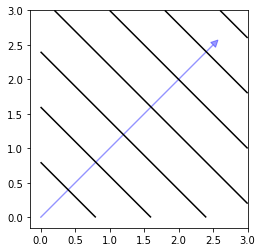

In [4]:
from pymoo.decomposition.weighted_sum import WeightedSum

dm = WeightedSum()
plot_contour(X, dm(X, weights=weights))

### Tchebysheff

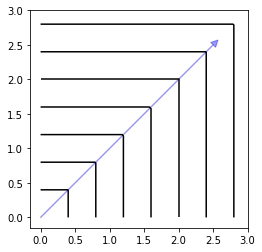

In [5]:
from pymoo.decomposition.tchebicheff import Tchebicheff

dm = Tchebicheff()
plot_contour(X, dm(X, weights=weights))

### Achievement Scalarization Function (ASF)

Details can be found in <cite data-cite="asf"></cite>.

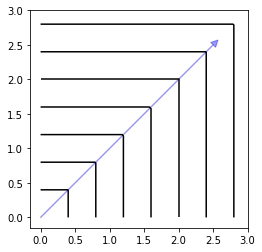

In [6]:
from pymoo.decomposition.asf import ASF

dm = ASF(eps=0.0)

plot_contour(X, dm(X, weights=weights))

### Augmented Achievement Scalarization Function (AASF)

Details can be found in <cite data-cite="aasf"></cite>.

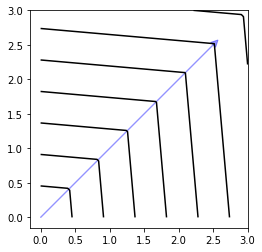

In [7]:
from pymoo.decomposition.aasf import AASF

dm = AASF(eps=0.0, beta=5)

plot_contour(X, dm(X, weights=weights))

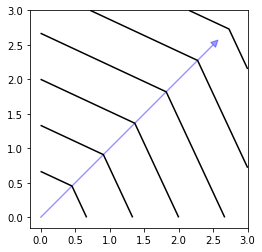

In [8]:
dm = AASF(eps=0.0, beta=25)

plot_contour(X, dm(X, weights=weights))

### PBI

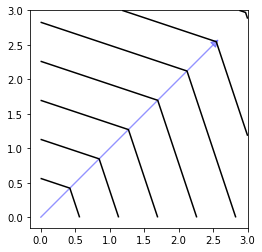

In [9]:
from pymoo.decomposition.pbi import PBI

dm = PBI(eps=0.0, theta=0.5)

plot_contour(X, dm(X, weights=weights))

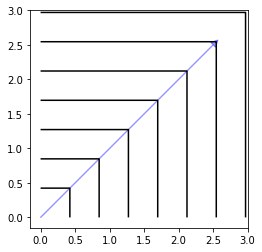

In [10]:
dm = PBI(eps=0.0, theta=1.0)
plot_contour(X, dm(X, weights=weights))

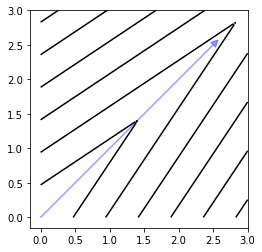

In [11]:
dm = PBI(eps=0.0, theta=5.0)
plot_contour(X, dm(X, weights=weights))